In [141]:
import torch
import math

# Аппроксимируемая функция
def f(x, y):
    return math.sin(x + 2 * y) * math.exp(-(2 * x + y)**2)

#Вспомогательная функция, применяет функцитю f к спискам
def f_list(x, y):
    result = []
    for i, vx in enumerate(x):
        vy = y[i]
        fv = f(vx, vy)
        result.append(fv)
    return result

#Вспомогательная функция, применяет функцитю f к тензорам
def f_tenzor(xt, yt):
    fv = f_list(X.tolist(), Y.tolist())
    return torch.Tensor(fv)

#Вспомогательная функция, скевает 3 тензора: 
# [a, b, c, d], [w, x, y, z], [e, f, g, h] => [[a, w, e], [b, x, f], [c, y, g], [d, z, h]]
def xyf(x, y, z):
    x = x.tolist()
    y = y.tolist()
    z = z.tolist()
    result = []
    for i, vx in enumerate(x):
        row = [x[i], y[i], z[i]]
        result.append(row)
    return torch.Tensor(result)

#Вспомогательная функция, скевает 3 тензора: 
# [a, b, c, d], [w, x, y, z] => [[a, w], [b, x], [c, y], [d, z]]
def xy(x, y):
    x = x.tolist()
    y = y.tolist()
    result = []
    for i, vx in enumerate(x):
        row = [x[i], y[i]]
        result.append(row)
    return torch.Tensor(result)



In [142]:
# Датасет:
X = 20 * torch.rand(20000) + -10
Y = 20 * torch.rand(20000) + -10

XY = xy(X, Y)
XY_list = XY.tolist()

F = f_tenzor(X, Y)
F_list = F.tolist()

#model_in = xyf(X, Y)

# print(F_list)

In [143]:
from sklearn.model_selection import train_test_split

XY_train, XY_test_val, F_train, F_test_val = train_test_split(XY_list, F_list, test_size=0.3, random_state=42)
XY_test, XY_val, F_test, F_val = train_test_split(XY_test_val, F_test_val, test_size=0.5, random_state=42)

Train_XY_tens = torch.Tensor(XY_train)
Train_F_tens = torch.Tensor(F_train)

Test_XY_tens = torch.Tensor(XY_test)
Test_F_tens = torch.Tensor(F_test)

print(Test_XY_train_tens)
print(Test_XY_train_tens)





tensor([ 0.0000, -0.0000,  0.0007,  ..., -0.0028,  0.0000,  0.0000])
tensor([ 0.0000, -0.0000,  0.0007,  ..., -0.0028,  0.0000,  0.0000])


In [144]:
neuron_count = 50

model = torch.nn.Sequential(
    torch.nn.Linear(2, neuron_count), # количество весов - 2, 1-ый это bias, 1-ый и 2-ой - аргументы (x, y) функции
    torch.nn.ReLU(),
    torch.nn.Linear(neuron_count, 1), # выходной слой, просто аггрегирующий результат работы сети в одномерный выход (f)
    torch.nn.ReLU(),
    torch.nn.Flatten(0, 1)
)

# Функция потерь MSE из torch.nn:
loss_fn = torch.nn.MSELoss(reduction='sum')

# Скорость обучения:
learning_rate = 1e-3

optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

# Оптимизационный цикл (цикл обучения):
for t in range(30):
    
    # Прямой проход: вычисляем предсказанный y пропуская вход Train_XY_tens через модель:
    y_pred = model(Train_XY_tens)
    
    # Считаем ошибку (MSE) предскзанного y_pred и истинного y:
    loss = loss_fn(y_pred, Train_F_tens)

    print(f'iter={t}, loss={loss.item()}')    # !!! loss.item()

    # Перед обратным проходом нам нужно занулить градиент для всех весов которые обновляет optimizer
    optimizer.zero_grad()

    # Обратный проход (вычисляем градиенты для весов модели относительно loss):
    loss.backward()

    # Обновляем веса оптимайзером:
    optimizer.step()






iter=0, loss=44722.03125
iter=1, loss=18606.732421875
iter=2, loss=9849.302734375
iter=3, loss=5757.90576171875
iter=4, loss=3602.43896484375
iter=5, loss=2380.828857421875
iter=6, loss=1650.1221923828125
iter=7, loss=1193.505859375
iter=8, loss=898.1530151367188
iter=9, loss=701.958740234375
iter=10, loss=568.610107421875
iter=11, loss=476.34613037109375
iter=12, loss=411.5394592285156
iter=13, loss=365.327392578125
iter=14, loss=331.90362548828125
iter=15, loss=307.40679931640625
iter=16, loss=289.2191467285156
iter=17, loss=275.537841796875
iter=18, loss=265.12579345703125
iter=19, loss=257.1141662597656
iter=20, loss=250.88037109375
iter=21, loss=245.972900390625
iter=22, loss=242.07481384277344
iter=23, loss=238.95413208007812
iter=24, loss=236.4368133544922
iter=25, loss=234.39163208007812
iter=26, loss=232.7168426513672
iter=27, loss=231.33546447753906
iter=28, loss=230.18980407714844
iter=29, loss=229.2357177734375


In [145]:
y_pred_on_test = model(Test_XY_tens)
# print(len((y_pred_on_test.tolist())))
loss_on_test = loss_fn(y_pred_on_test, Test_F_tens)
print("MSE on test = ", loss_on_test.tolist())

MSE on test =  50.556976318359375


In [146]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

def extractComponent(data, i):
    result = []
    for v in data:
        result.append(v[i])
    return result
    

X_for_plot = np.array(extractComponent(Test_XY_tens.tolist(), 0))
Y_for_plot = np.array(extractComponent(Test_XY_tens.tolist(), 1))
                     
F_real = np.array(Test_F_tens.tolist())
F_pred = np.array(y_pred_on_test.tolist())

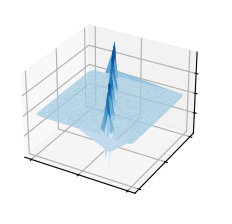

In [147]:


plt.style.use('_mpl-gallery')


# Plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_trisurf(X_for_plot, Y_for_plot, F_real, vmin=z.min(), cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

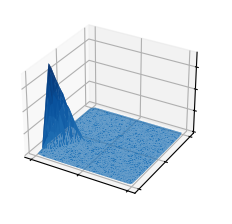

In [148]:
plt.style.use('_mpl-gallery')


# Plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_trisurf(X_for_plot, Y_for_plot, F_pred, vmin=z.min(), cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()